In [76]:
import pandas
import numpy
from sklearn.metrics import classification_report
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [77]:
data = pandas.read_csv("CW - part 2/data/processed.pkl.gz")

In [78]:
data

,ID,MRI_visit,delay,sex,hand,age,YOE,SES,MMSE,CDR,eTIV,nWBV,ASF
0,1,MR1,0,M,R,87,14,2.0,27.0,none,1987.0,0.696,0.883
1,1,MR2,457,M,R,88,14,2.0,30.0,none,2004.0,0.681,0.876
2,2,MR1,0,M,R,75,12,0.0,23.0,very mild,1678.0,0.736,1.046
3,2,MR2,560,M,R,76,12,0.0,28.0,very mild,1738.0,0.713,1.010
4,2,MR3,1895,M,R,77,12,0.0,22.0,very mild,1698.0,0.701,1.034
...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,149,MR2,842,M,R,81,16,1.0,28.0,very mild,1693.0,0.694,1.037
369,149,MR3,2297,M,R,82,16,1.0,26.0,very mild,1688.0,0.675,1.040
370,150,MR1,0,F,R,61,13,2.0,30.0,none,1319.0,0.801,1.331
371,150,MR2,763,F,R,62,13,2.0,30.0,none,1327.0,0.796,1.323


In [85]:
elbow_check = data[['age','nWBV']]

C:\Users\umihu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


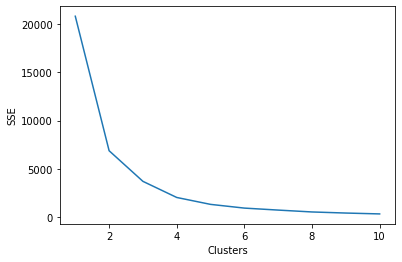

In [86]:
#elbow method
wcss = []
for i in range(1,11):
    k_means = KMeans(n_clusters=i,init='k-means++', random_state=42)
    k_means.fit(elbow_check)
    wcss.append(k_means.inertia_)
#plot elbow curve
plt.plot(numpy.arange(1,11),wcss)
plt.xlabel('Clusters')
plt.ylabel('SSE')
plt.show()

In [88]:
km = KMeans(n_clusters=2)
km

KMeans(n_clusters=2)

In [87]:
y_predicted = km.fit_predict(data[['age','nWBV']])
data['cluster'] = y_predicted
data.head()

,ID,MRI_visit,delay,sex,hand,age,YOE,SES,MMSE,CDR,eTIV,nWBV,ASF,cluster
0,1,MR1,0,M,R,87,14,2.0,27.0,none,1987.0,0.696,0.883,0
1,1,MR2,457,M,R,88,14,2.0,30.0,none,2004.0,0.681,0.876,0
2,2,MR1,0,M,R,75,12,0.0,23.0,very mild,1678.0,0.736,1.046,1
3,2,MR2,560,M,R,76,12,0.0,28.0,very mild,1738.0,0.713,1.010,1
4,2,MR3,1895,M,R,77,12,0.0,22.0,very mild,1698.0,0.701,1.034,0


Text(0.5, 1.0, 'nWBV correlation with age')

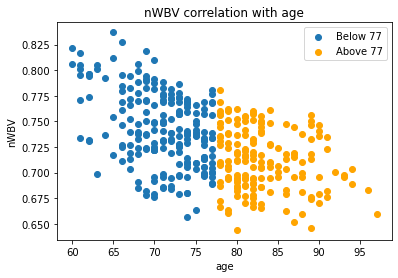

In [84]:
data1 = data[data.cluster == 0]
data2 = data[data.cluster == 1]

plt.scatter(data1.age, data1["nWBV"])
plt.scatter(data2.age, data2["nWBV"], color='orange')

plt.ylabel('nWBV')
plt.xlabel('age')
plt.legend(["Below 77", "Above 77"])
plt.title("nWBV correlation with age")